# ✈️ Saudi Flight Delays — **Light Edition (2023)**

This notebook analyzes a compact dataset of Saudi flight operations for **2023**, focusing on delay patterns and operational insights.

**What you'll see:**
- Data loading & cleaning
- KPIs and descriptive stats
- Visuals (matplotlib-only): status mix, average delays by airline/airport/weather, hourly/day patterns
- Simple predictive baseline (linear regression) for delay minutes
- Actionable recommendations (editable section)

**How to run:** Put `saudi_flight_delays_light.csv` in the same folder and run cells top-to-bottom.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 160)

## 1) Load Data

In [2]:
df = pd.read_csv('saudi_flight_delays_light.csv')
df.head()

,flight_id,date,airline,origin_airport,destination_airport,scheduled_departure,actual_departure,delay_minutes,status,weather_condition,day_of_week
0,200001,2023-01-01,Flyadeal,MED - Medina,JED - Jeddah,18:22:00,18:50:00,28.0,Delayed,Foggy,Sunday
1,200002,2023-01-01,Saudia,AHB - Abha,DMM - Dammam,11:57:00,12:08:00,11.0,On-time,Clear,Sunday
2,200003,2023-01-01,Flynas,RUH - Riyadh,TUU - Tabuk,14:50:00,15:04:00,14.0,On-time,Sandstorm,Sunday
3,200004,2023-01-01,Flynas,DMM - Dammam,AHB - Abha,13:49:00,13:56:00,7.0,On-time,Clear,Sunday
4,200005,2023-01-01,Saudia,JED - Jeddah,AHB - Abha,13:16:00,13:20:00,4.0,On-time,Clear,Sunday


## 2) Clean & Feature Engineering
- Convert date/time
- Derive hour of scheduled/actual departure, weekend flag
- Ensure delay is numeric (NaN for cancelled)

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['scheduled_hour'] = pd.to_datetime(df['scheduled_departure'], format='%H:%M:%S').dt.hour
df['actual_hour'] = pd.to_datetime(df['actual_departure'], format='%H:%M:%S', errors='coerce').dt.hour
df['delay_minutes'] = pd.to_numeric(df['delay_minutes'], errors='coerce')
df['is_weekend'] = df['day_of_week'].isin(['Friday','Saturday'])
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
df.head()

,flight_id,date,airline,origin_airport,destination_airport,scheduled_departure,actual_departure,delay_minutes,status,weather_condition,day_of_week,scheduled_hour,actual_hour,is_weekend,month
0,200001,2023-01-01,Flyadeal,MED - Medina,JED - Jeddah,18:22:00,18:50:00,28.0,Delayed,Foggy,Sunday,18,18.0,False,2023-01-01
1,200002,2023-01-01,Saudia,AHB - Abha,DMM - Dammam,11:57:00,12:08:00,11.0,On-time,Clear,Sunday,11,12.0,False,2023-01-01
2,200003,2023-01-01,Flynas,RUH - Riyadh,TUU - Tabuk,14:50:00,15:04:00,14.0,On-time,Sandstorm,Sunday,14,15.0,False,2023-01-01
3,200004,2023-01-01,Flynas,DMM - Dammam,AHB - Abha,13:49:00,13:56:00,7.0,On-time,Clear,Sunday,13,13.0,False,2023-01-01
4,200005,2023-01-01,Saudia,JED - Jeddah,AHB - Abha,13:16:00,13:20:00,4.0,On-time,Clear,Sunday,13,13.0,False,2023-01-01


## 3) Quick KPIs

In [4]:
total_flights = len(df)
status_mix = df['status'].value_counts(normalize=True).rename(lambda x: f"{x} %").mul(100).round(1)
avg_delay = df['delay_minutes'].mean()
print('Total flights:', total_flights)
print(status_mix)
print('Average delay (min):', round(float(avg_delay),1))

Total flights: 10923
status
Delayed %      50.0
On-time %      48.4
Cancelled %     1.6
Name: proportion, dtype: float64
Average delay (min): 21.0


## 4) Visual Analysis (matplotlib)

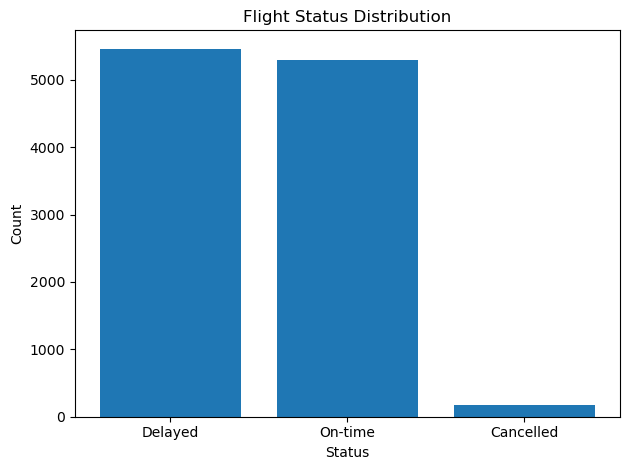

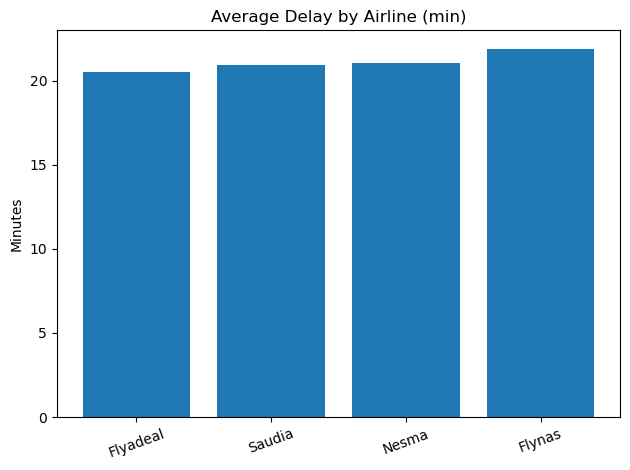

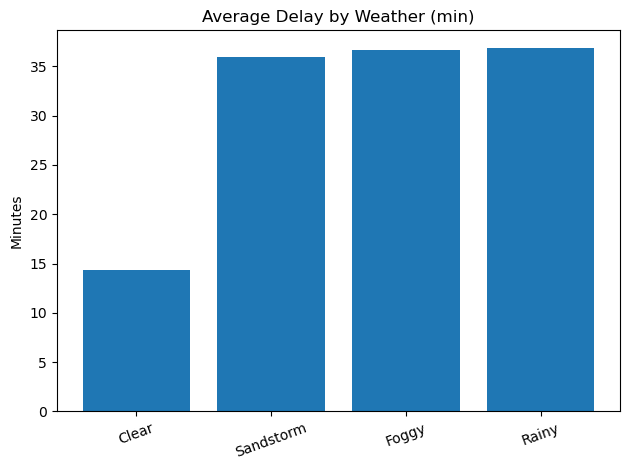

In [5]:
# Status distribution
counts = df['status'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Flight Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout(); plt.show()

# Average delay by airline
delay_airline = df.groupby('airline')['delay_minutes'].mean().sort_values()
plt.figure()
plt.bar(delay_airline.index, delay_airline.values)
plt.title('Average Delay by Airline (min)')
plt.xticks(rotation=20)
plt.ylabel('Minutes')
plt.tight_layout(); plt.show()

# Average delay by weather
delay_weather = df.groupby('weather_condition')['delay_minutes'].mean().sort_values()
plt.figure()
plt.bar(delay_weather.index, delay_weather.values)
plt.title('Average Delay by Weather (min)')
plt.xticks(rotation=20)
plt.ylabel('Minutes')
plt.tight_layout(); plt.show()

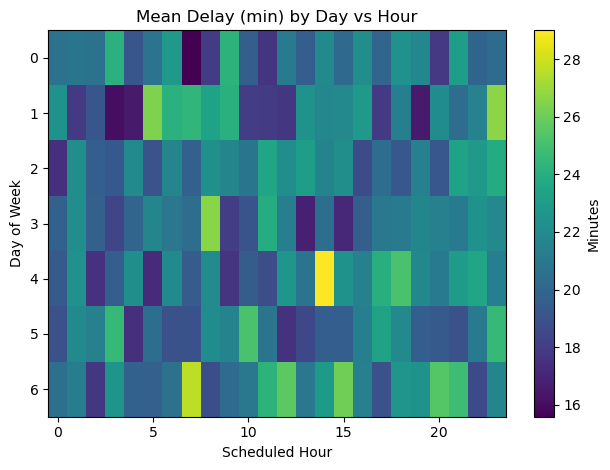

scheduled_hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,20.575758,20.772152,20.654545,24.171875,19.185185,20.701493,22.800000,15.583333,17.943396,24.239437,19.666667,17.575758,21.125000,19.609375,22.014925,20.161290,22.187500,19.966667,22.357143,21.864407,17.796610,23.029412,19.927536,20.275362
Monday,22.405797,17.854545,19.150000,16.058824,16.565217,26.388889,24.135593,24.388889,23.343750,24.101449,18.000000,17.984848,17.708333,22.438596,21.785714,21.885246,22.803571,17.880597,21.396825,16.538462,22.092308,20.360656,21.531250,26.671642
Tuesday,17.383333,22.223684,19.576271,19.262295,21.986111,19.000000,21.710526,19.767123,22.323529,21.711864,20.787500,23.472727,22.160000,23.035088,21.606061,22.223684,18.723077,20.452830,19.256757,21.448718,19.236842,23.314286,22.862500,23.836735
Wednesday,19.741935,22.237288,19.716981,18.389831,19.935065,21.700000,20.920000,20.380952,26.622222,18.013699,19.086207,23.891892,21.333333,16.783784,20.430769,17.149254,19.647059,20.969231,21.152542,21.725806,21.451613,21.092593,22.500000,21.917808
Thursday,19.406780,22.377358,17.520000,19.640625,22.266667,17.258621,21.938462,19.492063,22.038462,17.638554,19.525424,18.800000,22.632653,20.746269,29.000000,22.430556,21.452055,24.056604,25.142857,21.867647,21.185714,22.975309,23.513158,21.384615


In [6]:
# Heatmap: mean delay by day of week vs scheduled hour
pivot = df.pivot_table(index='day_of_week', columns='scheduled_hour', values='delay_minutes', aggfunc='mean')
pivot = pivot.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.figure()
plt.imshow(pivot, aspect='auto')
plt.title('Mean Delay (min) by Day vs Hour')
plt.xlabel('Scheduled Hour')
plt.ylabel('Day of Week')
plt.colorbar(label='Minutes')
plt.tight_layout(); plt.show()
pivot.head()

## 5) Simple Predictive Baseline

In [7]:
model_df = df.dropna(subset=['delay_minutes']).copy()
features = pd.get_dummies(model_df[['airline','origin_airport','weather_condition','scheduled_hour']], drop_first=True)
target = model_df['delay_minutes']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, pred)
print('MAE (minutes):', round(float(mae), 2))

MAE (minutes): 12.06


## 6) Recommendations (edit below)
- **Weather buffers:** Add schedule buffers for Rain/Fog/Sandstorm periods.
- **Peak hours staffing:** Allocate extra ground staff during hours showing highest mean delays.
- **Airport ops:** Focus improvements on airports with highest average delays.
- **Proactive comms:** Notify passengers when predicted delay exceeds a threshold.